**Problem Statement**

Develop a Convolutional Neural Network (CNN) model to classify images of fruits into three
categories: strawberries, pomegranates, and peaches.
Expected Outcome: A CNN model that can accurately classify fruit images into one of the
three specified categories AND ALSO TRY TRANSFER LEARNING. You are to submit a report
documenting their model architecture, data augmentation techniques, training process, and
evaluation metrics including accuracy and loss graphs.

In [47]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import necessary libraries
import pandas as pd
import pandas as np
#regular expression for identifying pattern
import re
#OS library for operating system
import os
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping



In [4]:
#defining a regular expression for each category
peach_pattern = r"\b(fresh_peach)"
pomegranate_pattern = r"\b(fresh_pomegranate)"
strawberry_pattern = r"\b(fresh_strawberry)"

#Defining a function to categorize fruit based on the filename
def categorize_fruit(item):
  if re.search(peach_pattern, item, re.IGNORECASE):
    return 'Peach'
  elif re.search(pomegranate_pattern, item, re.IGNORECASE):
    return 'Pomegranate'
  elif re.search(strawberry_pattern, item, re.IGNORECASE):
    return 'Strawberry'
  else:
    return 'Others'


In [5]:
data_path = '/content/drive/MyDrive/fruits (2)'

In [6]:
#looping through all the data frame to get a category
data = []

for filename in os.listdir(data_path):
  category = categorize_fruit(filename)
  data.append([filename, category])


In [7]:
data

[['fresh_peach_100.jpg', 'Peach'],
 ['fresh_peach_106.jpg', 'Peach'],
 ['fresh_peach_107.jpg', 'Peach'],
 ['fresh_peach_101.jpg', 'Peach'],
 ['fresh_peach_1.jpg', 'Peach'],
 ['fresh_peach_104.jpg', 'Peach'],
 ['fresh_peach_10.jpg', 'Peach'],
 ['fresh_peach_103.jpg', 'Peach'],
 ['fresh_peach_105.jpg', 'Peach'],
 ['fresh_peach_108.jpg', 'Peach'],
 ['fresh_peach_102.jpg', 'Peach'],
 ['fresh_pomegranate_163.jpg', 'Pomegranate'],
 ['fresh_peach_47.jpg', 'Peach'],
 ['fresh_strawberry_99.jpg', 'Strawberry'],
 ['fresh_strawberry_245.jpg', 'Strawberry'],
 ['fresh_pomegranate_223.jpg', 'Pomegranate'],
 ['fresh_pomegranate_106.jpg', 'Pomegranate'],
 ['fresh_strawberry_73.jpg', 'Strawberry'],
 ['fresh_pomegranate_288.jpg', 'Pomegranate'],
 ['fresh_pomegranate_320.jpg', 'Pomegranate'],
 ['fresh_peach_219.jpg', 'Peach'],
 ['fresh_pomegranate_156.jpg', 'Pomegranate'],
 ['fresh_peach_182.jpg', 'Peach'],
 ['fresh_peach_217.jpg', 'Peach'],
 ['fresh_peach_17.jpg', 'Peach'],
 ['fresh_peach_29.jpg', 'Peach

In [8]:
pd.DataFrame(data, columns = ['Filename', 'category'])

,Filename,category
0,fresh_peach_100.jpg,Peach
1,fresh_peach_106.jpg,Peach
2,fresh_peach_107.jpg,Peach
3,fresh_peach_101.jpg,Peach
4,fresh_peach_1.jpg,Peach
...,...,...
806,fresh_pomegranate_109.jpg,Pomegranate
807,fresh_strawberry_205.jpg,Strawberry
808,fresh_strawberry_88.jpg,Strawberry
809,fresh_strawberry_158.jpg,Strawberry


In [10]:
#saving data frame into a variable
df = pd.DataFrame(data, columns = ['Filename', 'category'])

In [11]:
#checking first five rows
df.head()

,Filename,category
0,fresh_peach_100.jpg,Peach
1,fresh_peach_106.jpg,Peach
2,fresh_peach_107.jpg,Peach
3,fresh_peach_101.jpg,Peach
4,fresh_peach_1.jpg,Peach


In [12]:
df.category.value_counts()

category
Pomegranate    311
Peach          250
Strawberry     250
Name: count, dtype: int64

In [16]:
# import necessary libraries for data augmentation configuration
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
images_dir = data_path

In [19]:
# data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

In [22]:
# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=data_path,
    x_col='Filename',
    y_col='category',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed = 42)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=data_path,
    x_col='Filename',
    y_col='category',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed =42)

Found 649 validated image filenames belonging to 3 classes.
Found 162 validated image filenames belonging to 3 classes.


In [23]:
train_generator

In [24]:
#import necessary libraries for CNN configuration
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [25]:
# The convolutional neural network(CNN) configuration.
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [27]:
# compiling the model before training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#training the model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
41/41 [==============================] - 222s 5s/step - loss: 1.1086 - accuracy: 0.3575 - val_loss: 0.9719 - val_accuracy: 0.4444
Epoch 2/10
41/41 [==============================] - 43s 1s/step - loss: 0.9336 - accuracy: 0.5039 - val_loss: 0.9987 - val_accuracy: 0.5123
Epoch 3/10
41/41 [==============================] - 44s 1s/step - loss: 0.8612 - accuracy: 0.5639 - val_loss: 0.7278 - val_accuracy: 0.6481
Epoch 4/10
41/41 [==============================] - 44s 1s/step - loss: 0.6880 - accuracy: 0.6826 - val_loss: 0.6921 - val_accuracy: 0.6420
Epoch 5/10
41/41 [==============================] - 44s 1s/step - loss: 0.5942 - accuracy: 0.7411 - val_loss: 0.8396 - val_accuracy: 0.6173
Epoch 6/10
41/41 [==============================] - 44s 1s/step - loss: 0.5587 - accuracy: 0.7458 - val_loss: 0.5804 - val_accuracy: 0.7901
Epoch 7/10
41/41 [==============================] - 45s 1s/step - loss: 0.4612 - accuracy: 0.8259 - val_loss: 0.4347 - val_accuracy: 0.8457
Epoch 8/10
41/41 [=

In [29]:
#Evaluation of the model on a validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation accuracy: {val_accuracy}")

11/11 [==============================] - 5s 406ms/step - loss: 0.5609 - accuracy: 0.8148
Validation Loss: 0.5608981847763062
Validation accuracy: 0.8148148059844971


In [30]:
#Preparing images for input into neural network models
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image_category(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0

    # Make a prediction
    prediction = model.predict(img_preprocessed)

    # We need to invert this dictionary to map indices back to class names.
    label_map = dict((v, k) for k, v in train_generator.class_indices.items())

    # Find the index of the maximum score in the prediction array
    predicted_class_index = np.argmax(prediction, axis=1)
    predicted_class_name = label_map[predicted_class_index[0]]

    return predicted_class_name


In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_image_with_prediction(image_path, model):
    # Predict the image category
    predicted_category = predict_image_category(image_path, model)

    # Load the image for display
    img = image.load_img(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks

    # Add a rectangle for the text background, if desired
    plt.gca().add_patch(Rectangle((0, 0), 120, 30, color='white'))

    # Add the predicted category text
    plt.text(5, 20, predicted_category, color='red', weight='bold', fontsize=20)

    plt.show()


1/1 [==============================] - 0s 278ms/step


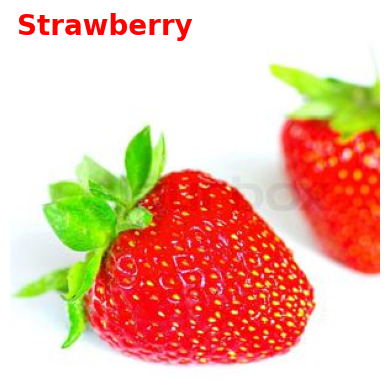

In [32]:
#Example usage
image_path = '/content/drive/MyDrive/fruits (2)/fresh_strawberry_58.jpg'
display_image_with_prediction(image_path, model)


1/1 [==============================] - 0s 115ms/step


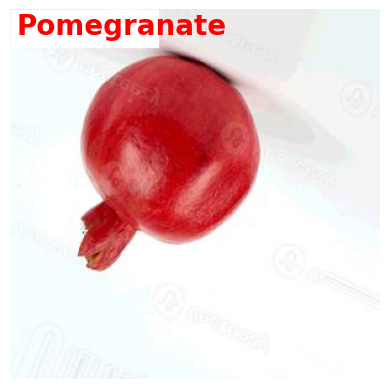

In [33]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_pomegranate_70.jpg'
display_image_with_prediction(image_path, model)

1/1 [==============================] - 0s 81ms/step


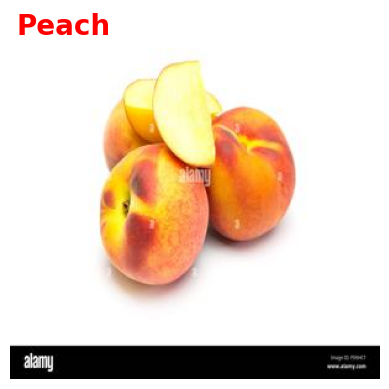

In [34]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_peach_86.jpg'
display_image_with_prediction(image_path, model)

1/1 [==============================] - 0s 113ms/step


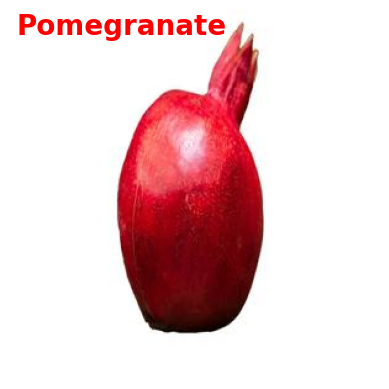

In [37]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_pomegranate_194.jpg'
display_image_with_prediction(image_path, model)

1/1 [==============================] - 0s 110ms/step


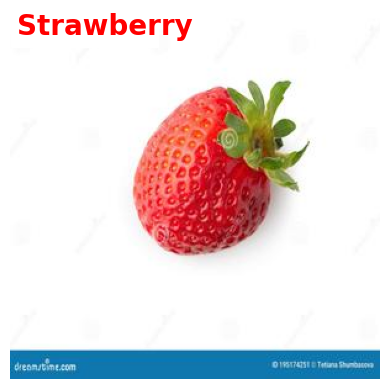

In [38]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_strawberry_161.jpg'
display_image_with_prediction(image_path, model)

1/1 [==============================] - 0s 46ms/step


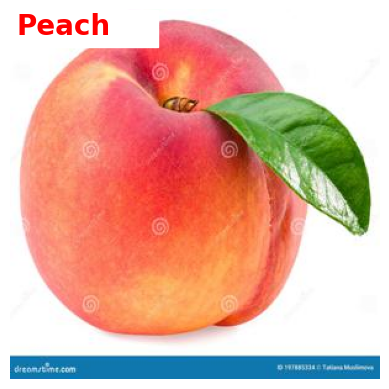

In [40]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_peach_227.jpg'
display_image_with_prediction(image_path, model)

**Using a Pretrained Model**

In [42]:
#import necessary libraries
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [43]:

# Load the base INCEPTION v3 model, excluding its top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# This is the model we will train
new_model = Model(inputs=base_model.input, outputs=predictions)

# Calculate class weights to address class imbalance
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                classes= np.unique(train_generator.classes),
                y= train_generator.classes)

class_weights = dict(enumerate(class_weights))

# Compile the model
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)





87910968/87910968 [==============================] - 1s 0us/step


In [44]:
# data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

In [45]:
#Create data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=data_path,
    x_col='Filename',
    y_col='category',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed = 42)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=data_path,
    x_col='Filename',
    y_col='category',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed = 42)

Found 649 validated image filenames belonging to 3 classes.
Found 162 validated image filenames belonging to 3 classes.


In [46]:
# Train the model
history = new_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    #class_weight=class_weights,
    callbacks=[early_stopping])

Epoch 1/10
41/41 [==============================] - 107s 2s/step - loss: 0.2780 - accuracy: 0.8752 - val_loss: 0.1719 - val_accuracy: 0.9259
Epoch 2/10
41/41 [==============================] - 108s 3s/step - loss: 0.1079 - accuracy: 0.9507 - val_loss: 0.1015 - val_accuracy: 0.9630
Epoch 3/10
41/41 [==============================] - 98s 2s/step - loss: 0.0790 - accuracy: 0.9646 - val_loss: 0.0830 - val_accuracy: 0.9815
Epoch 4/10
41/41 [==============================] - 118s 3s/step - loss: 0.0591 - accuracy: 0.9723 - val_loss: 0.2404 - val_accuracy: 0.9198
Epoch 5/10
41/41 [==============================] - 99s 2s/step - loss: 0.0781 - accuracy: 0.9738 - val_loss: 0.0815 - val_accuracy: 0.9815
Epoch 6/10
41/41 [==============================] - 97s 2s/step - loss: 0.1257 - accuracy: 0.9584 - val_loss: 0.2656 - val_accuracy: 0.8765
Epoch 7/10
41/41 [==============================] - 98s 2s/step - loss: 0.1132 - accuracy: 0.9584 - val_loss: 0.0651 - val_accuracy: 0.9691
Epoch 8/10
41/41 

In [48]:
# Evaluate the model on the validation set
val_loss, val_accuracy = new_model.evaluate(validation_generator)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_accuracy}")

11/11 [==============================] - 19s 2s/step - loss: 0.0215 - accuracy: 1.0000
Validation loss: 0.021492023020982742
Validation accuracy: 1.0


1/1 [==============================] - 2s 2s/step


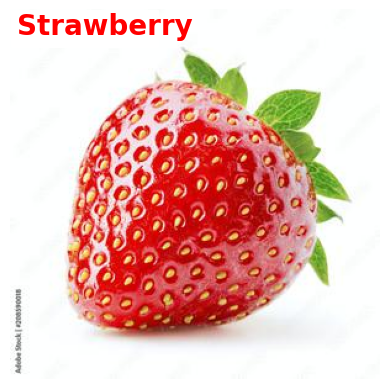

In [50]:
#Example Usage
image_path = '/content/drive/MyDrive/fruits (2)/fresh_strawberry_7.jpg'
display_image_with_prediction(image_path, new_model)

1/1 [==============================] - 0s 294ms/step


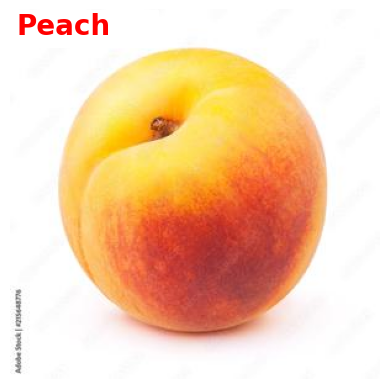

In [51]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_peach_3.jpg'
display_image_with_prediction(image_path, new_model)

1/1 [==============================] - 0s 135ms/step


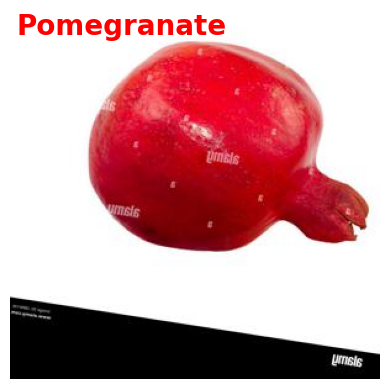

In [53]:
image_path = '/content/drive/MyDrive/fruits (2)/fresh_pomegranate_134.jpg'
display_image_with_prediction(image_path, new_model)